In [ ]:
#| default_exp datasets.benchmark
#| default_cls_lvl 3

In [ ]:
#| export
from fastai.data.all import *

from tsfast.data import *
from tsfast.datasets.core import create_dls_downl
import identibench as idb

In [ ]:
#| export
BENCHMARK_DL_KWARGS = {
    # Simulation Benchmarks
    'BenchmarkWH_Simulation':               {'win_sz': 200},
    'BenchmarkSilverbox_Simulation':        {'win_sz': 200},
    'BenchmarkCascadedTanks_Simulation':   {'win_sz': 150, 'bs': 16},
    'BenchmarkEMPS_Simulation':             {'win_sz': 1000},
    'BenchmarkCED_Simulation':              {'win_sz': 100, 'bs': 16},
    'BenchmarkNoisyWH_Simulation':         {'win_sz': 100, 'stp_sz': 50},
    'BenchmarkRobotForward_Simulation':    {'win_sz': 300, 'valid_stp_sz': 4},
    'BenchmarkRobotInverse_Simulation':    {'win_sz': 300, 'valid_stp_sz': 4},
    'BenchmarkShip_Simulation':             {'win_sz': 100},
    'BenchmarkQuadPelican_Simulation':     {'win_sz': 300, 'valid_stp_sz': 40},
    'BenchmarkQuadPi_Simulation':          {'win_sz': 200, 'valid_stp_sz': 20},

    # Prediction Benchmarks
    'BenchmarkWH_Prediction':               {},
    'BenchmarkSilverbox_Prediction':        {},
    'BenchmarkCascadedTanks_Prediction':   {'bs': 16},
    'BenchmarkEMPS_Prediction':             {},
    'BenchmarkCED_Prediction':              {'bs': 16},
    'BenchmarkNoisyWH_Prediction':         {'stp_sz': 50},
    'BenchmarkRobotForward_Prediction':    {'valid_stp_sz': 4},
    'BenchmarkRobotInverse_Prediction':    {'valid_stp_sz': 4},
    'BenchmarkShip_Prediction':             {},
    'BenchmarkQuadPelican_Prediction':     {'valid_stp_sz': 40},
    'BenchmarkQuadPi_Prediction':          {'valid_stp_sz': 20},
}

In [ ]:
#| export
@delegates(create_dls_downl,keep=True)
def create_dls_from_spec(
    spec: idb.benchmark.BenchmarkSpecBase, # Specification of the benchmark from identibench
    **kwargs # kwargs for create_dls_downl
    ):
    '''
    Create a dataloaders object from identibench benchmark specification. Extracts
    benchmark specific kwargs from BENCHMARK_DL_KWARGS and adds them to the kwargs for create_dls_downl.
    '''
    # add kwargs form spec to dl_kwargs if the key is not already in dl_kwargs
    spec_kwargs = {
        'u': spec.u_cols,
        'y': spec.y_cols,
        'download_function': spec.download_func,
        'dataset':spec.dataset_path
    }

    #add prediction specific kwargs
    if isinstance(spec, idb.benchmark.BenchmarkSpecPrediction):
        spec_kwargs.update({
            'win_sz': spec.pred_horizon+spec.init_window,
            'valid_stp_sz': spec.pred_step,
            'prediction': True
        })

    #add tsfast specific kwargs using BENCHMARK_DL_KWARGS
    if spec.name in BENCHMARK_DL_KWARGS:
        spec_kwargs.update(BENCHMARK_DL_KWARGS[spec.name])

    dl_kwargs = {**spec_kwargs, **kwargs}
    return create_dls_downl(**dl_kwargs)

### Wiener Hammerstein Benchmark Dataset

In [ ]:
#| export
create_dls_wh =partial(
    create_dls_from_spec,
    spec=idb.BenchmarkWH_Simulation,
    win_sz=200
)
create_dls_wh_prediction =partial(
    create_dls_from_spec,
    spec=idb.BenchmarkWH_Prediction
)

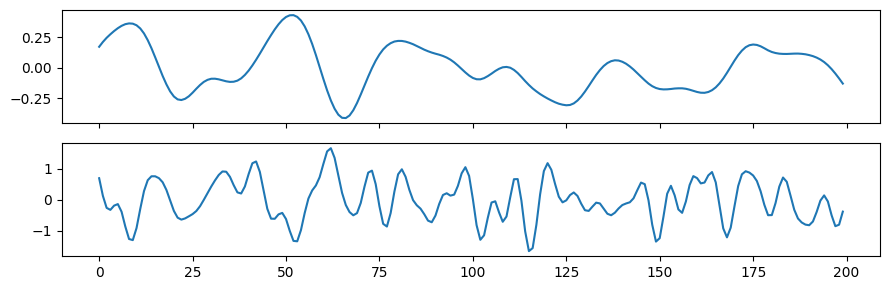

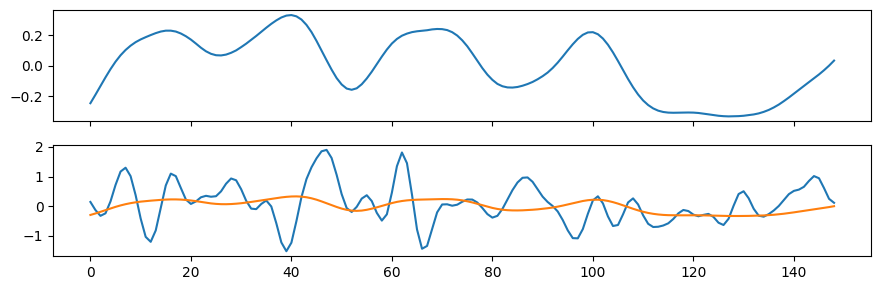

In [ ]:
dls = create_dls_wh()
dls.show_batch(max_n=1)
dls = create_dls_wh_prediction()
dls.show_batch(max_n=1)

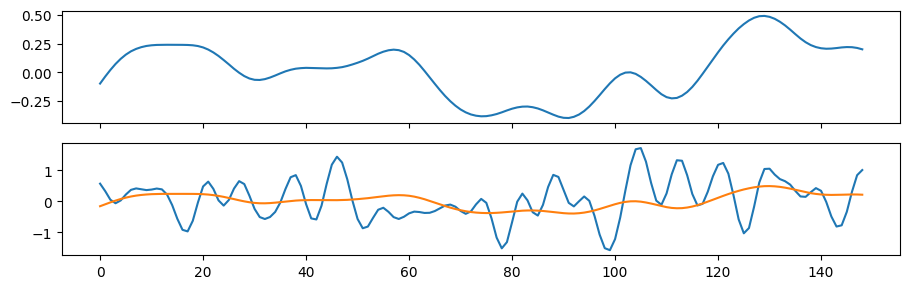

In [ ]:
dls[-1].show_batch(max_n=1)

### Silverbox Benchmark Dataset

In [ ]:
#| export
create_dls_silverbox =partial(
    create_dls_from_spec,
    spec=idb.BenchmarkSilverbox_Simulation,
    win_sz=200
)
create_dls_silverbox_prediction =partial(
    create_dls_from_spec,
    spec=idb.BenchmarkSilverbox_Prediction
)

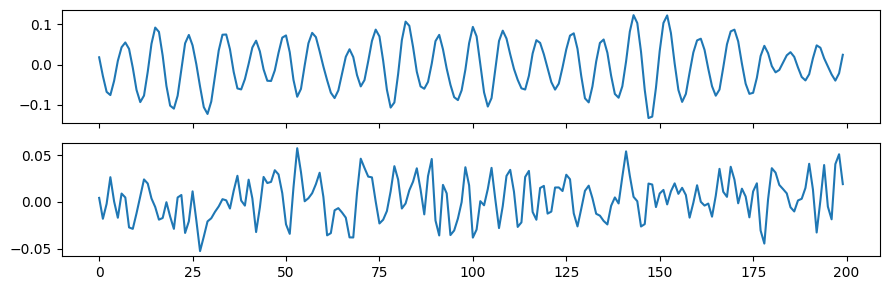

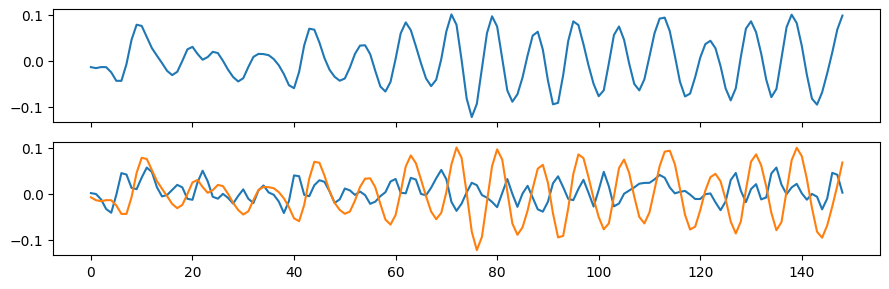

In [ ]:
dls = create_dls_silverbox()
dls.show_batch(max_n=1)
dls = create_dls_silverbox_prediction()
dls.show_batch(max_n=1)

### Cascaded Tanks Benchmark Dataset

In [ ]:
#| export
create_dls_cascaded_tanks =partial(
    create_dls_from_spec,
    spec=idb.BenchmarkCascadedTanks_Simulation,
    win_sz=150,
    bs=16,
)
create_dls_cascaded_tanks_prediction =partial(
    create_dls_from_spec,
    spec=idb.BenchmarkCascadedTanks_Prediction,
    bs=16
)

In [ ]:
dls = create_dls_cascaded_tanks()
len(dls.items)

715

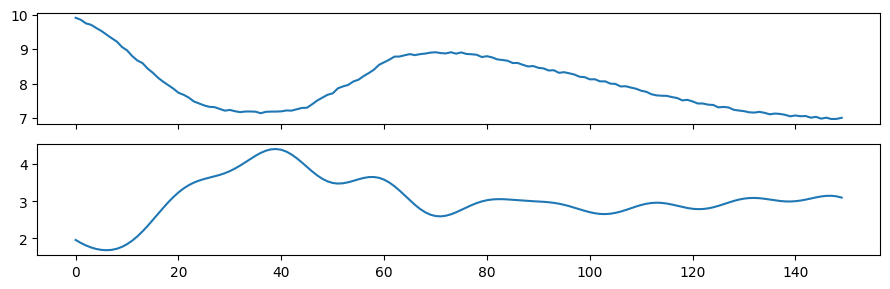

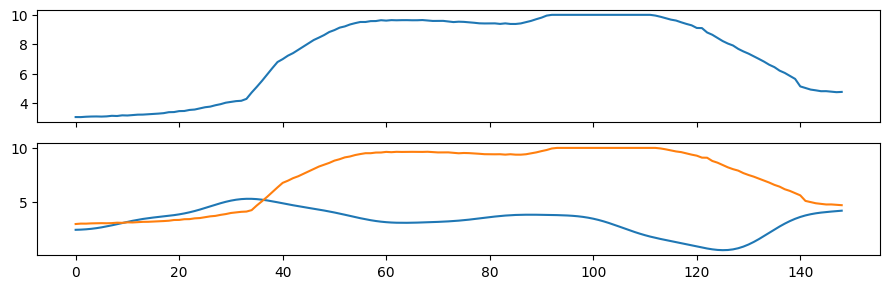

In [ ]:
dls = create_dls_cascaded_tanks()
dls.show_batch(max_n=1)
dls = create_dls_cascaded_tanks_prediction()
dls.show_batch(max_n=1)

### EMPS Benchmark Dataset

In [ ]:
#| export
create_dls_emps =partial(
    create_dls_from_spec,
    spec=idb.BenchmarkEMPS_Simulation,
    win_sz=1000
)
create_dls_emps_prediction =partial(
    create_dls_from_spec,
    spec=idb.BenchmarkEMPS_Prediction
)

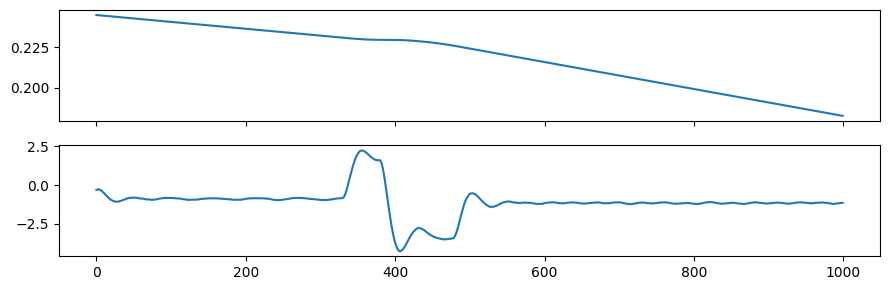

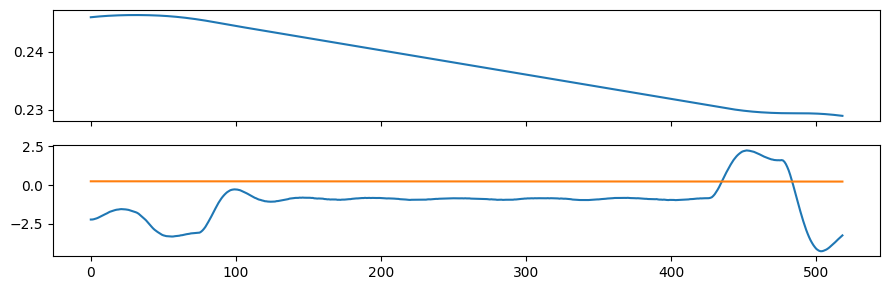

In [ ]:
dls = create_dls_emps()
dls.show_batch(max_n=1)
dls = create_dls_emps_prediction()
dls.show_batch(max_n=1)

### CED Benchmark Dataset

In [ ]:
#| export
create_dls_ced =partial(
    create_dls_from_spec,
    spec=idb.BenchmarkCED_Simulation,
    win_sz=100,
    bs=16
)
create_dls_ced_prediction =partial(
    create_dls_from_spec,
    spec=idb.BenchmarkCED_Prediction,
    bs=16
)

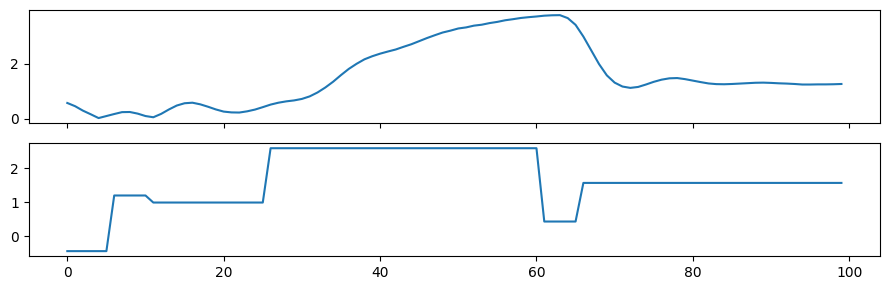

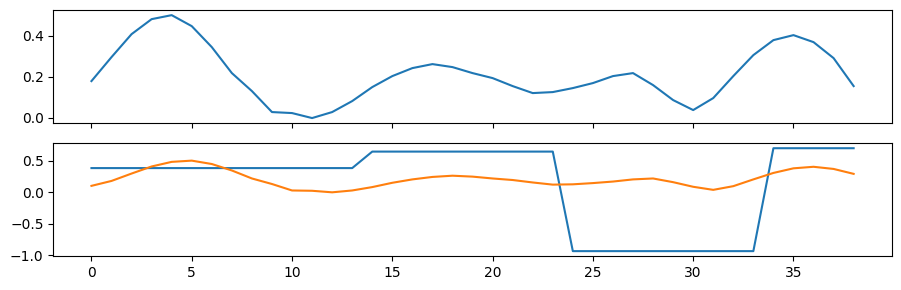

In [ ]:
dls = create_dls_ced()
dls.show_batch(max_n=1)
dls = create_dls_ced_prediction()
dls.show_batch(max_n=1)

### Wiener Hammerstein with Process Noise Benchmark Dataset

In [ ]:
#| export
create_dls_noisy_wh =partial(
    create_dls_from_spec,
    spec=idb.BenchmarkNoisyWH_Simulation,
    win_sz=100,
    stp_sz=50
)
create_dls_noisy_wh_prediction =partial(
    create_dls_from_spec,
    spec=idb.BenchmarkNoisyWH_Prediction,
    stp_sz=50
)


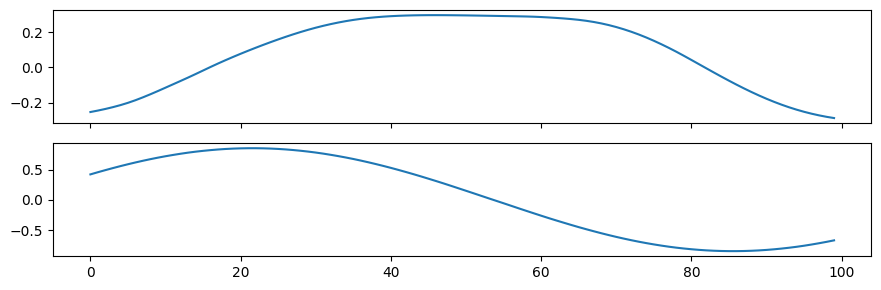

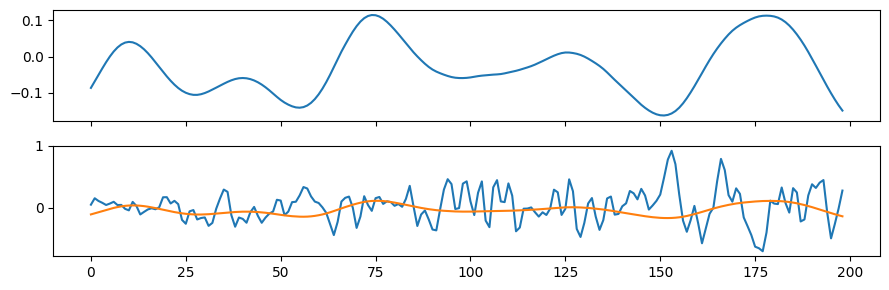

In [ ]:
dls = create_dls_noisy_wh()
dls.show_batch(max_n=1)
dls = create_dls_noisy_wh_prediction()
dls.show_batch(max_n=1)

### Industrial Robot Benchmark Dataset

In [ ]:
#| export
create_dls_robot_forward =partial(
    create_dls_from_spec,
    spec=idb.BenchmarkRobotForward_Simulation,
    win_sz=300,
    valid_stp_sz=4
)
create_dls_robot_forward_prediction =partial(
    create_dls_from_spec,
    spec=idb.BenchmarkRobotForward_Prediction,
    valid_stp_sz=4
)

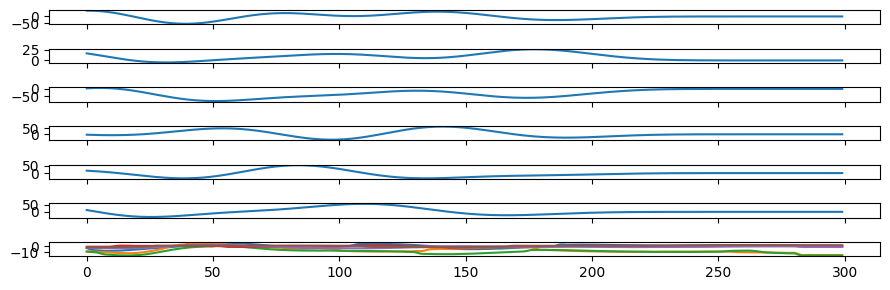

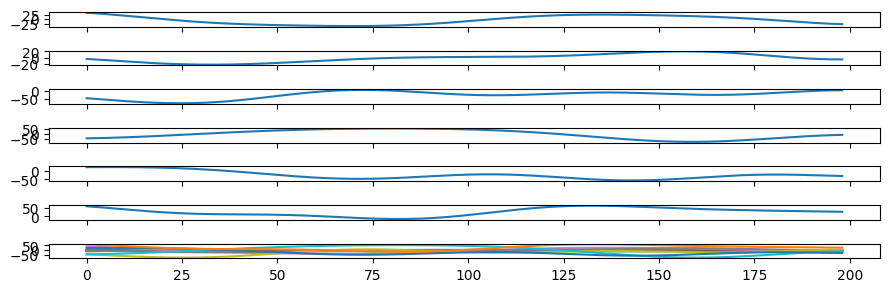

In [ ]:
dls = create_dls_robot_forward()
dls.show_batch(max_n=1)
dls = create_dls_robot_forward_prediction()
dls.show_batch(max_n=1)

In [ ]:
#| export
create_dls_robot_inverse =partial(
    create_dls_from_spec,
    spec=idb.BenchmarkRobotInverse_Simulation,
    win_sz=300,
    valid_stp_sz=4
)
create_dls_robot_inverse_prediction =partial(
    create_dls_from_spec,
    spec=idb.BenchmarkRobotInverse_Prediction,
    valid_stp_sz=4
)

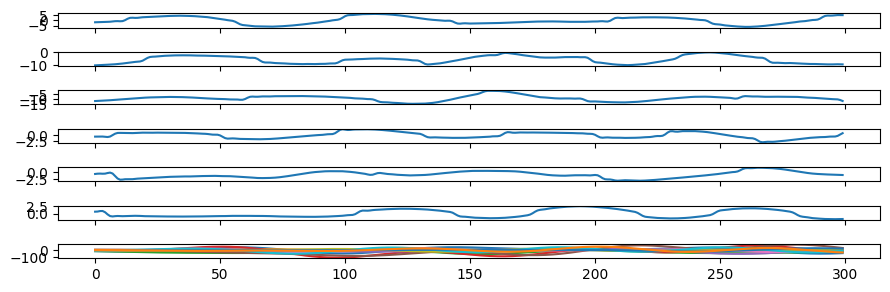

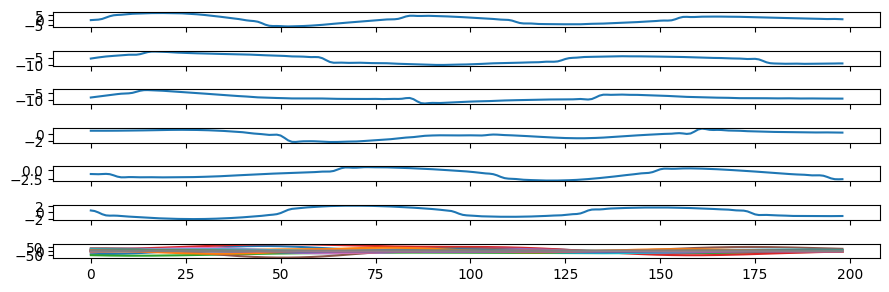

In [ ]:
dls = create_dls_robot_inverse()
dls.show_batch(max_n=1)
dls = create_dls_robot_inverse_prediction()
dls.show_batch(max_n=1)

### Ship Benchmark Dataset

In [ ]:
#| export
create_dls_ship =partial(
    create_dls_from_spec,
    spec=idb.BenchmarkShip_Simulation,
    win_sz=100,
)
create_dls_ship_prediction =partial(
    create_dls_from_spec,
    spec=idb.BenchmarkShip_Prediction,
)

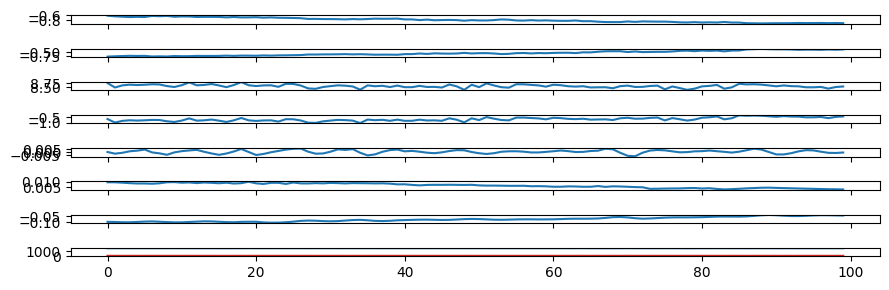

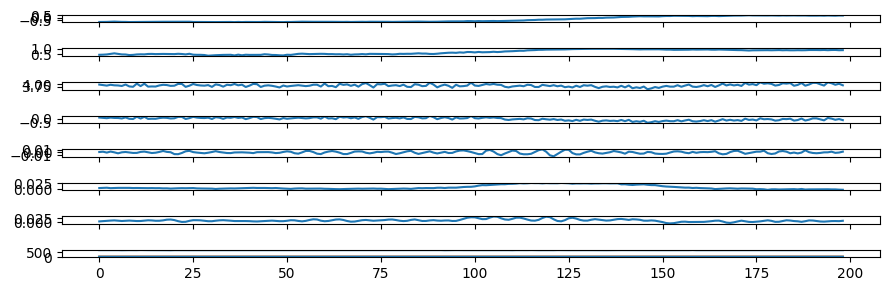

In [ ]:
dls = create_dls_ship()
dls.show_batch(max_n=1)
dls = create_dls_ship_prediction()
dls.show_batch(max_n=1)

### Quadrotor Pelican Dataset

In [ ]:
#| export
create_dls_quad_pelican =partial(
    create_dls_from_spec,
    spec=idb.BenchmarkQuadPelican_Simulation,
    win_sz=300,
    valid_stp_sz=40
)
create_dls_quad_pelican_prediction =partial(
    create_dls_from_spec,
    spec=idb.BenchmarkQuadPelican_Prediction,
    valid_stp_sz=40
)

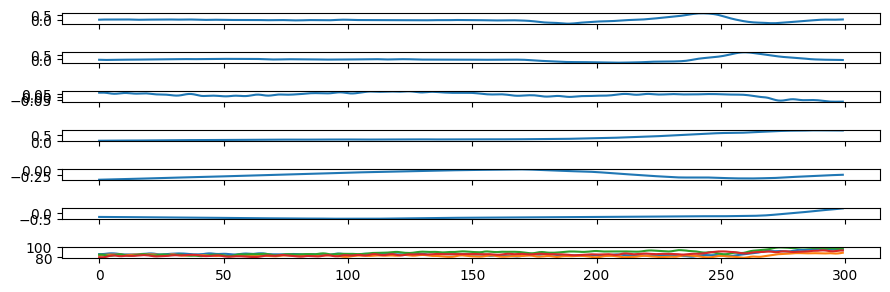

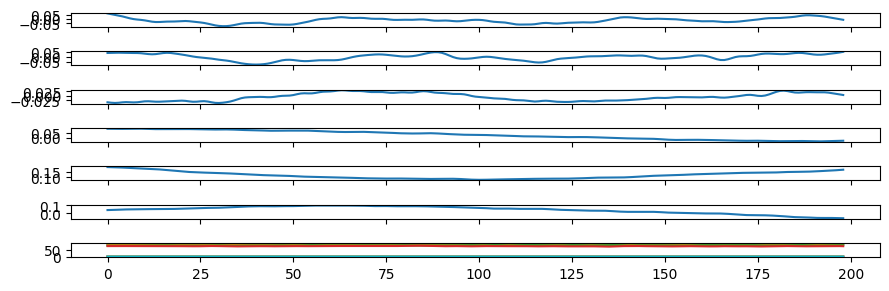

In [ ]:
dls = create_dls_quad_pelican()
dls.show_batch(max_n=1)
dls = create_dls_quad_pelican_prediction()
dls.show_batch(max_n=1)

### Quadrotor PI Dataset

In [ ]:
#| export
create_dls_quad_pi =partial(
    create_dls_from_spec,
    spec=idb.BenchmarkQuadPi_Simulation,
    win_sz=200,
    valid_stp_sz=20,
)
create_dls_quad_pi_prediction =partial(
    create_dls_from_spec,
    spec=idb.BenchmarkQuadPi_Prediction,
    valid_stp_sz=20
)

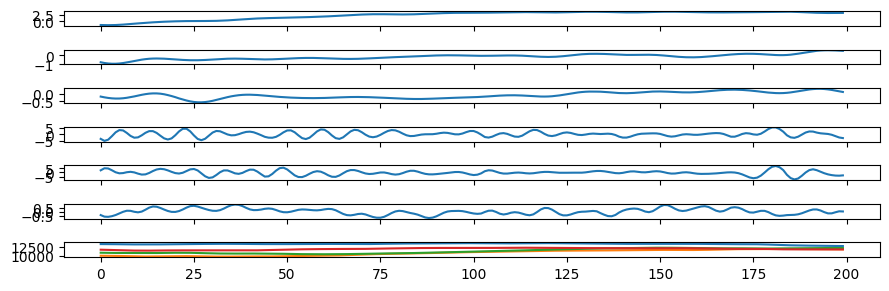

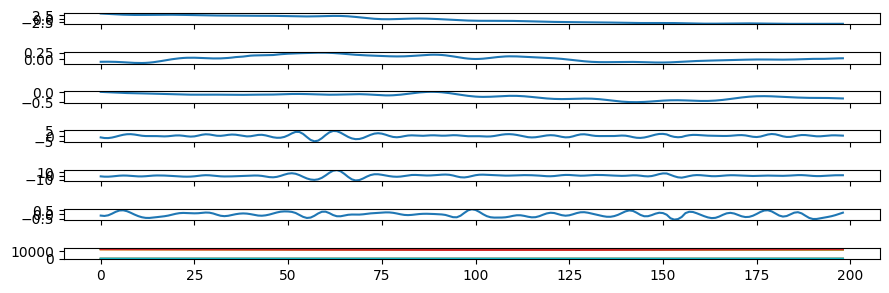

In [ ]:
dls = create_dls_quad_pi()
dls.show_batch(max_n=1)
dls = create_dls_quad_pi_prediction()
dls.show_batch(max_n=1)

### BROAD Dataset

In [ ]:
#| export
broad_u_imu_acc = [f'imu_acc{i}' for i in range(3)]
broad_u_imu_gyr = [f'imu_gyr{i}' for i in range(3)]
broad_u_imu_mag = [f'imu_mag{i}' for i in range(3)]
broad_y_opt_pos = [f'opt_pos{i}' for i in range(4)]
broad_y_opt_quat = [f'opt_quat{i}' for i in range(4)]

broad_u = broad_u_imu_acc+broad_u_imu_gyr

In [ ]:
#| export
#Todo: add spec, when available
create_dls_broad = partial(
    create_dls_downl, 
    download_function=idb.datasets.broad.dl_broad,
    u=broad_u,y=broad_y_opt_quat,
    win_sz=100,
    stp_sz=30,
)

create_dls_broad_prediction = partial(
    create_dls_downl, 
    download_function=idb.datasets.broad.dl_broad,
    u=broad_u,y=broad_y_opt_quat,
    win_sz=100,
    stp_sz=30,
    prediction=True
)

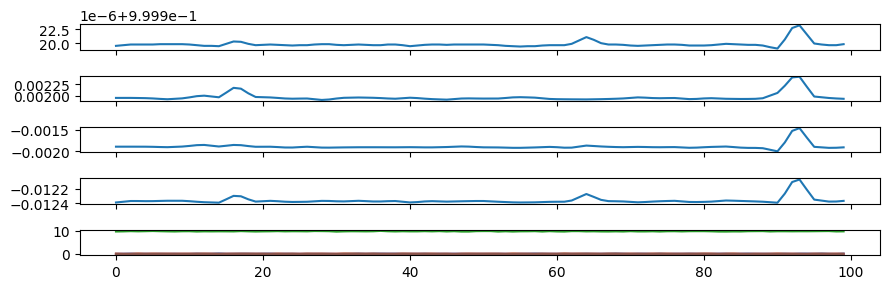

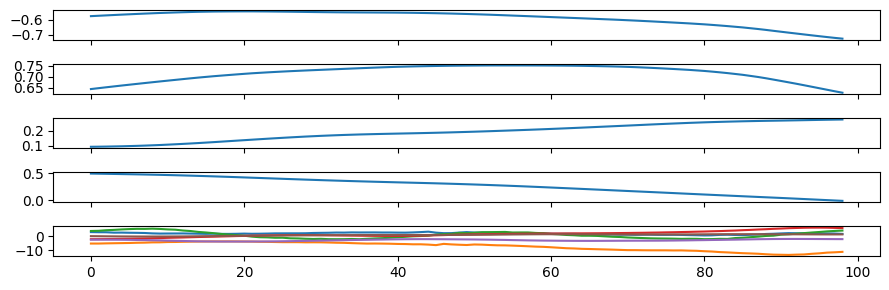

In [ ]:
dls = create_dls_broad()
dls.show_batch(max_n=1)
dls = create_dls_broad_prediction()
dls.show_batch(max_n=1)

## All datasets

In [ ]:
#| export
external_datasets_simulation = [
    create_dls_wh,
    create_dls_silverbox,
    create_dls_robot_forward,
    create_dls_noisy_wh,
    create_dls_ced,
    # create_dls_broad,
    create_dls_emps
]

In [ ]:
#| export
external_datasets_prediction = [
    # create_dls_broad_prediction,
    create_dls_cascaded_tanks_prediction,
    create_dls_emps_prediction,
    create_dls_ced_prediction,
    create_dls_noisy_wh_prediction,
    create_dls_quad_pelican_prediction,
    create_dls_quad_pi_prediction,
    create_dls_robot_forward_prediction,
    create_dls_robot_inverse_prediction,
    create_dls_ship_prediction,
    create_dls_silverbox_prediction,
    create_dls_wh_prediction
]

In [ ]:
#| hide
#os.remove('dls_normalize.p')
#clean_default_dataset_path()

In [ ]:
#| include: false
import nbdev; nbdev.nbdev_export()